In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# polynomial basis function
def x_transform(x, degrees):
    # x --> input
    # degrees --> value of M till we want to transform the input

    # reshaping X to a column vector
    x = x.reshape(-1, 1)

    # the first column should have all ones
    x_new = np.ones((x.shape[0], 1))

    # making a copy of X
    t = x.copy()

    # Appending columns of higher degrees to X
    for i in range(1, degrees):
        x_new = np.append(x_new, t**i, axis=1)
            
    return x_new

In [12]:
# Predicting the output
def predict(x, w):
    # x --> input
    # w --> weights (parameter)
    
    # Adding degrees to input X, tranforming till M
    degrees = w.shape[0]
    x1 = x_transform(x, degrees)
    
    # predicting the output
    y_pred = np.dot(x1, w)
    return y_pred

In [13]:
# Calculating loss
def loss(y, y_pred):
    # y --> target value
    # y_pred --> predicted value
    
    # mean squared error
    loss = np.mean((y_pred - y)**2)
    return loss

In [18]:
# Calculating r2 score
def r2_score(y, y_pred):
    # y - y_pred / y - mean
    # checking variance dependency
    
    return 1 - (np.sum((np.array(y_pred)-np.array(y))**2)/
                np.sum((np.array(y)-np.mean(np.array(y)))**2))

In [15]:
M = [7, 9] # degree value
N = [7, 9, 15, 25] # number of points in train dataset

Degree: 7 Number of Points: 7


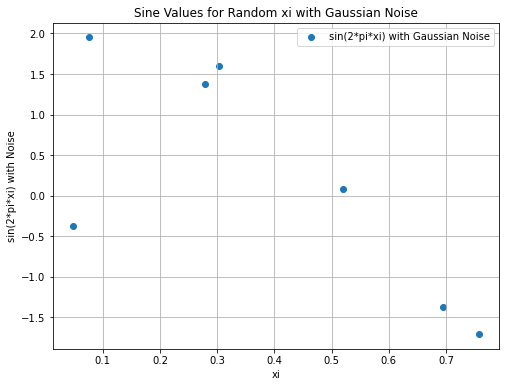

Final Plot for Degree: 7 Number of Points: 7


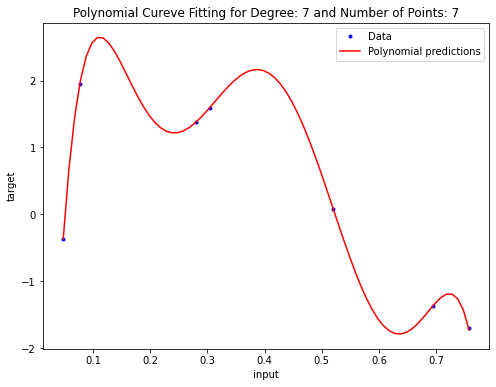

Loss:  7.501635775863158e-15
R2 Score:  0.9999999999999959
---------------------------------------------
Degree: 7 Number of Points: 9


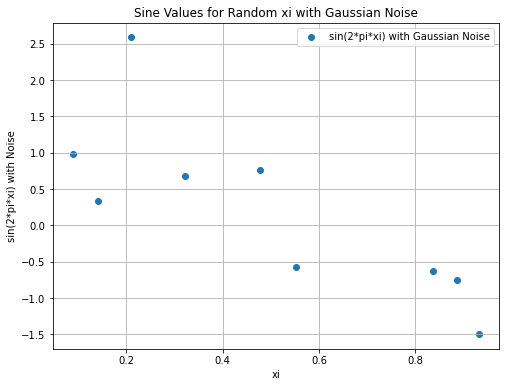

Final Plot for Degree: 7 Number of Points: 9


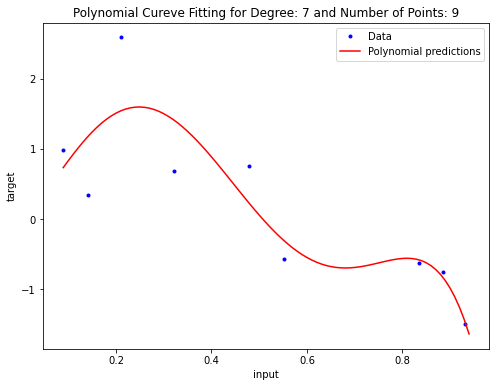

Loss:  0.30362996384618274
R2 Score:  0.7706822966418521
---------------------------------------------
Degree: 7 Number of Points: 15


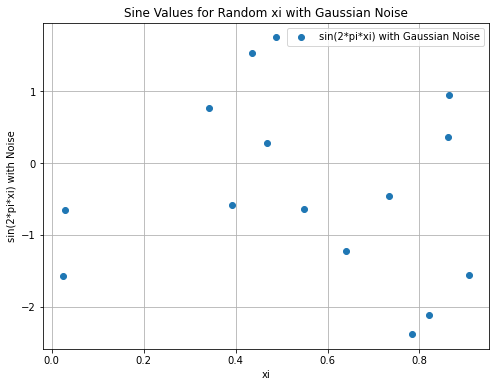

Final Plot for Degree: 7 Number of Points: 15


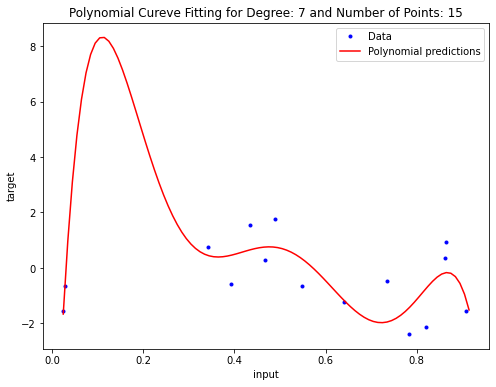

Loss:  0.7287727361748001
R2 Score:  0.5254569862211712
---------------------------------------------
Degree: 7 Number of Points: 25


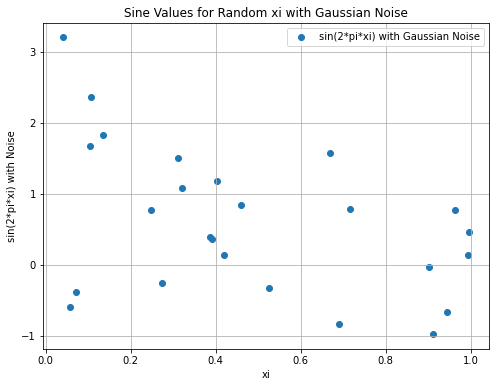

Final Plot for Degree: 7 Number of Points: 25


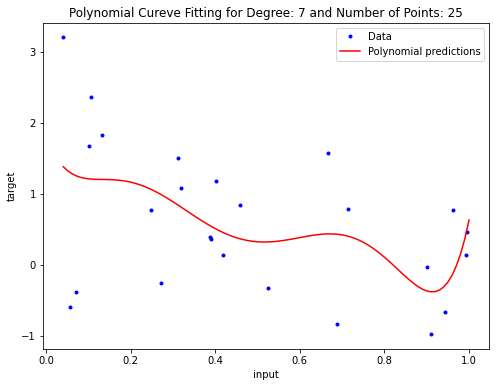

Loss:  0.7808801451490706
R2 Score:  0.25425574794144457
---------------------------------------------
Degree: 9 Number of Points: 7


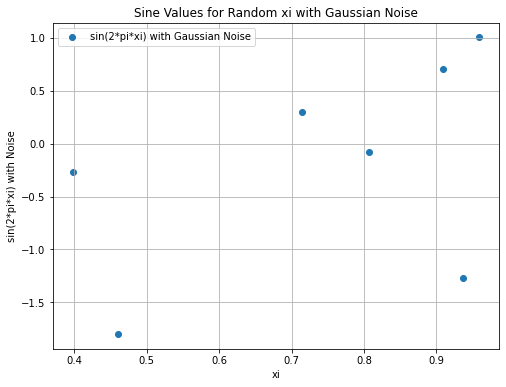

Final Plot for Degree: 9 Number of Points: 7


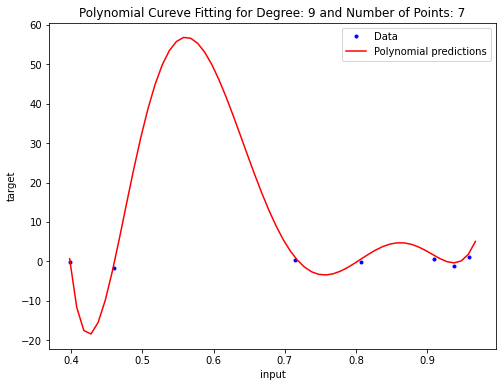

Loss:  0.717945082749795
R2 Score:  0.19300530171506858
---------------------------------------------
Degree: 9 Number of Points: 9


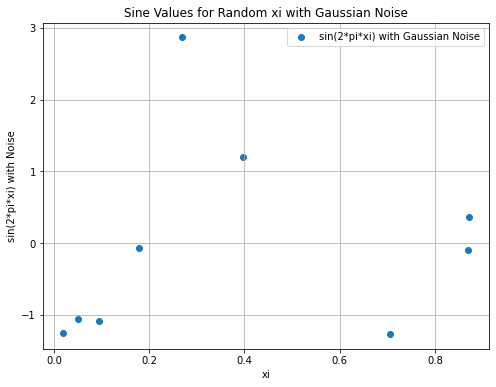

Final Plot for Degree: 9 Number of Points: 9


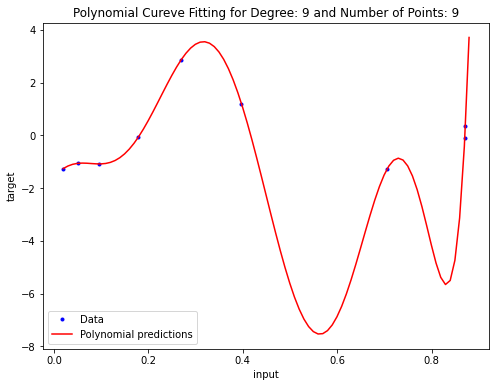

Loss:  1.8713371934418793e-10
R2 Score:  0.9999999998897665
---------------------------------------------
Degree: 9 Number of Points: 15


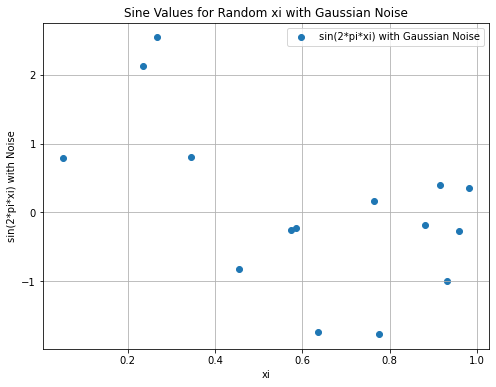

Final Plot for Degree: 9 Number of Points: 15


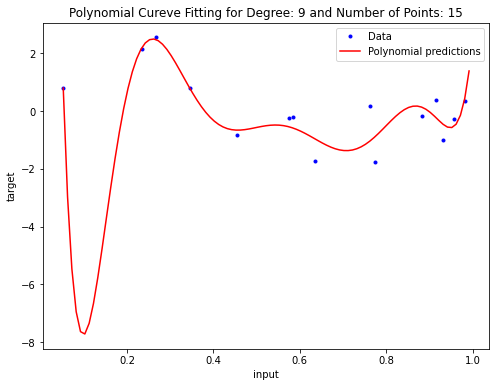

Loss:  0.26104737015951424
R2 Score:  0.8096274954279133
---------------------------------------------
Degree: 9 Number of Points: 25


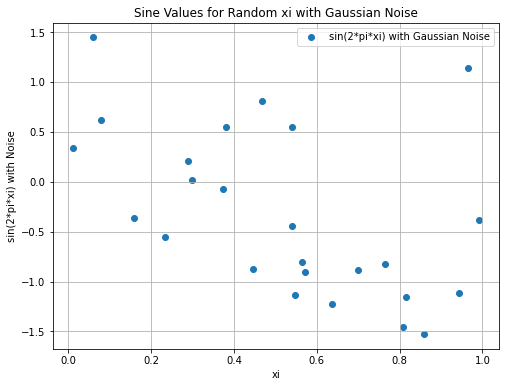

Final Plot for Degree: 9 Number of Points: 25


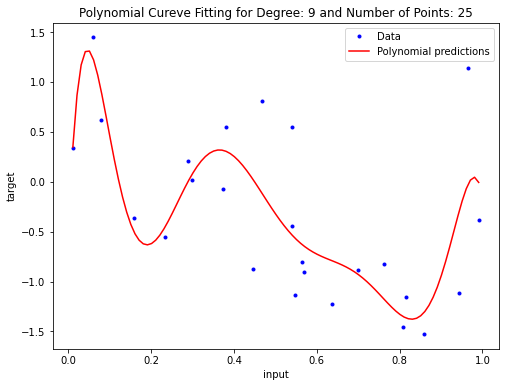

Loss:  0.2504391147183636
R2 Score:  0.6291292709768959
---------------------------------------------


In [17]:
for degree in M:
    for num_points in N:
        # generating random num_points between 0 to 1
        random_x_values = np.random.rand(num_points)

        # Calculate sin(2*pi*xi) for each xi
        sine_values = np.sin(2 * np.pi * random_x_values)

        # Add Gaussian noise with mean 0 and variance ±1
        noise = np.random.normal(0, 1, num_points)

        # Add the Gaussian noise to the sine values
        sine_values_with_noise = sine_values + noise

        # Plot the sine values with noise
        print('Degree:', degree, 'Number of Points:', num_points)
        plt.figure(figsize=(8, 6))
        plt.scatter(random_x_values, sine_values_with_noise, label='sin(2*pi*xi) with Gaussian Noise')
        plt.xlabel('xi')
        plt.ylabel('sin(2*pi*xi) with Noise')
        plt.legend()
        plt.title('Sine Values for Random xi with Gaussian Noise')
        plt.grid(True)
        plt.show()

        # transforming x to polynomial basis, i.e. summation wi * (x ** i) till M/degree
        phi = x_transform(random_x_values, degree)

        # calcuting inverse of phi.transpose * phi (left multiplicant in W mle)
        A_mat = np.linalg.inv(np.dot(phi.T, phi))
        
        # calculating phi.transopse * t (right multiplicant in W mle)
        B_mat = np.dot(phi.T, sine_values_with_noise)

        # calculating W mle or final solution of Linear Least Squares
        w = np.dot(A_mat, B_mat)

        # plotting the final polynomial regression
        print('Final Plot for Degree:', degree, 'Number of Points:', num_points)
        fig = plt.figure(figsize=(8,6))
        plt.plot(random_x_values, sine_values_with_noise, 'b.')

        # plotting the predicted values for a range of x values between min and max of random_x_values spaced by 0.01
        xmin = min(random_x_values)
        xmax = max(random_x_values)
        xx = np.arange(xmin, xmax+0.01, 0.01)
        yy = np.array(predict(xx, w))

        plt.plot(xx, yy, 'r')
        plt.legend(["Data", "Polynomial predictions"])
        plt.xlabel('input')
        plt.ylabel('target')
        plt.title('Polynomial Cureve Fitting for Degree: ' + str(degree) + ' and Number of Points: ' + str(num_points))
        plt.show()

        # printing the loss and r2 score
        print('Loss: ', loss(sine_values_with_noise, predict(random_x_values, w)))
        print('R2 Score: ', r2_score(sine_values_with_noise, predict(random_x_values, w)))

        print('---------------------------------------------')